# Detecting Credit Card Fraud with Machine Learning

Project Authors: Immaculate, Joan, Bertha, James, John, Evelyne

## Overview

Credit card fraud is a persistent and growing problem in the financial industry, costing billions of dollars each year. With the rise of digital payments and online transactions, detecting fraudulent activities in real-time has become a major priority. This project aims to analyze credit card transaction data to detect potential fraud using advanced data analytics and machine learning techniques. By identifying abnormal patterns and behaviors, financial institutions can protect consumers and minimize financial loss.

## Business Understanding

Financial institutions face high risks from fraudulent transactions, which can lead to substantial financial losses and damaged customer trust. Traditional fraud detection methods, such as rule-based systems, are often not sufficient to catch increasingly sophisticated fraudulent behavior. Therefore, businesses require intelligent systems that can automatically and accurately detect anomalies in transaction data. This project seeks to bridge that gap by developing a data-driven model that can learn from past transaction patterns and flag suspicious activity in near real-time.

## Objectives

1. Analyze and preprocess credit card transaction data for fraud detection.

2. Identify key features and patterns that indicate fraudulent behavior.

3. Develop and compare multiple machine learning models for fraud classification.

4. Address class imbalance using techniques like SMOTE, undersampling, or ensemble methods.

5. Evaluate model performance using metrics such as precision, recall, and AUC-ROC.

6. Ensure the model is interpretable and efficient enough for potential real-time deployment.

## Research Questions

1. What distinguishing characteristics or patterns can be identified between fraudulent and legitimate credit card transactions?

2. Which machine learning algorithms are most effective for detecting fraud in highly imbalanced transaction datasets?

3. What techniques can be applied to address class imbalance and enhance the performance of fraud detection models?

4. How can an optimal balance between precision and recall be achieved to minimize both false positives and false negatives in fraud detection?

5. Is it feasible to deploy the fraud detection model in real-time or near real-time environments without compromising accuracy and efficiency?

6. To what extent can the fraud detection model provide interpretable outputs suitable for compliance and audit purposes in the financial industry?





## Success Criteria


### Technical Criteria
1. Recall (Fraud Class) ≥ 90% – correctly identify most fraudulent transactions.

2. Precision (Fraud Class) ≥ 70% – limit false alarms to reduce customer disruption.

3. AUC-ROC Score ≥ 0.90 – strong ability to distinguish fraud vs. non-fraud.

4. Class Imbalance Handling – use techniques like SMOTE or undersampling to ensure balanced learning.

5. Model Stability – consistent results across validation folds or different data splits.

   
### Business Criteria
1. Reduced Financial Losses – potential savings through early fraud detection.

2. Low False Positive Rate – minimize blocking of legitimate transactions.

3. Real-Time Readiness – model is efficient enough for real-time or near-real-time deployment.

4. Interpretability – model outputs are explainable for auditing and compliance.



# Data Understanding

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [129]:
!pip install --upgrade pandas

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [130]:
!pip install pandas==2.2.2


  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [131]:
df = pd.read_csv('credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [132]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0,59870.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [134]:
df.shape

(1296675, 24)

In [135]:
#stastical summary of the data
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [136]:
# Number of unique values per column
df.nunique()

,0
Unnamed: 0,1296675
trans_date_trans_time,1274791
cc_num,983
merchant,693
category,14
amt,52928
first,352
last,481
gender,2
street,983


In [137]:
print(df['category'].value_counts())

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64


In [138]:
print(df['gender'].value_counts())

gender
F    709863
M    586812
Name: count, dtype: int64


In [139]:
print(df['job'].value_counts())

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64


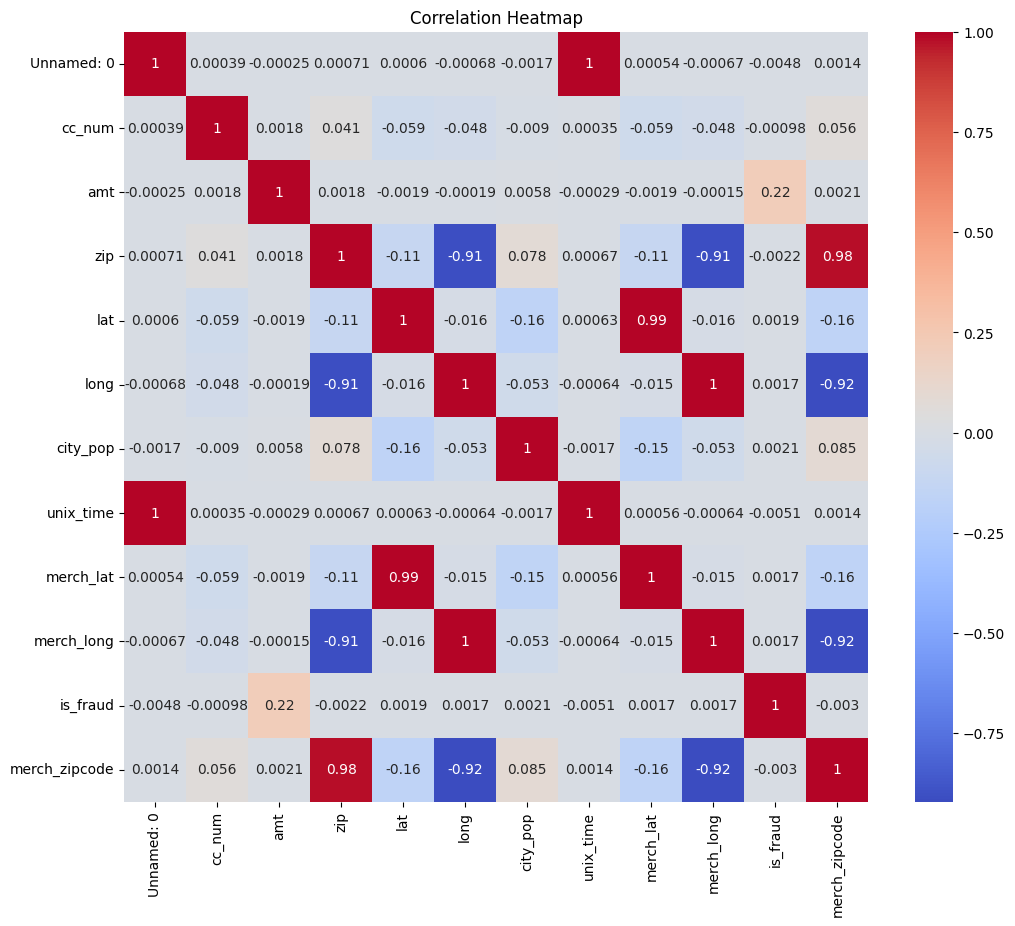

In [140]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Transaction amount doesn't seem strongly linearly related to the other numerical features.

Cardholder locations are correlated with each other, as are merchant locations, suggesting geographical patterns.

There's a weak tendency for transactions to happen somewhat near the cardholder's location.

City population has a weak linear relationship with geographical coordinates and transaction amount

## Data Cleaning

### Handling Missing Values

In [141]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


- For every column with one row with a missing value we simply drop since it doesn't affect the modeling process or insights to be drawn

In [142]:
#drop those rows
df.dropna(subset=['city', 'state', 'zip', 'lat', 'long', 'city_pop',
                  'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
                  'merch_long', 'is_fraud'], inplace=True)


- For the column merch_zipcode since we have soo many missing values we replace them or fill them with a placeholder value that will not overlap with the real zip codes such as 99999 or we can use the KNN model method

In [143]:
#Using a placeholder
df['merch_zipcode'].fillna(99999, inplace=True)

<ipython-input-143-ca3ed7dd1aab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['merch_zipcode'].fillna(99999, inplace=True)


In [144]:
#Using KNN model
# Rows with known zipcodes
df_with_zip = df[df['merch_zipcode'].notnull()]

# Rows with missing zipcodes but valid coordinates
df_missing_zip = df[df['merch_zipcode'].isnull()].dropna(subset=['merch_lat', 'merch_long'])


In [145]:
# Features for matching
X_reference = df_with_zip[['merch_lat', 'merch_long']].values
X_missing = df_missing_zip[['merch_lat', 'merch_long']].values

# Train nearest neighbors model (using 1 neighbor)
knn_model = NearestNeighbors(n_neighbors=1)
knn_model.fit(X_reference)


NearestNeighbors(n_neighbors=1)

In [146]:
#check missing values again
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


### Handling Duplicates

In [147]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

- Simply means no duplicates so let's move to outliers

### Handling Outliers

- For outliers we fous on the numeric column like amt, city_pop
- But first let us visualize the outliers using boxplots and IQR




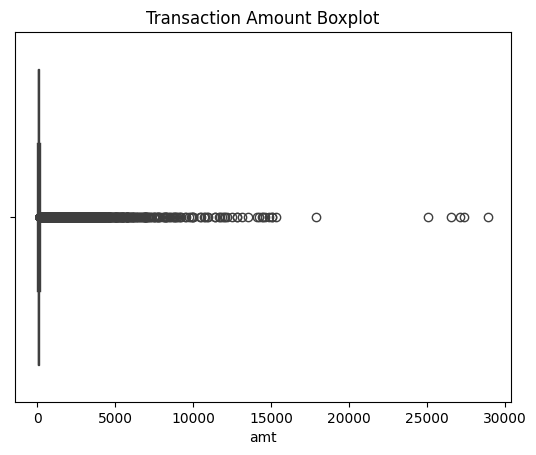

In [148]:
#Boxplots
sns.boxplot(x=df['amt'])
plt.title('Transaction Amount Boxplot')
plt.show()





In [149]:
#Using IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

#Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Lower Bound: -100.58499999999998
Upper Bound: 193.375


In [150]:
#count the outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 67290


- Outliers might actually be useful fraud signals so we retain them and create a new column flagging whether a transaction is an outliers or not

In [151]:
#Create a new column for outlier transactions
df['amt_outlier'] = ((df['amt'] < lower_bound) | (df['amt'] > upper_bound)).astype(int)


In [152]:
#View the column
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,amt_outlier
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,99999.0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,99999.0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,0


#Exploratory Data Analysis(EDA)

## Univariate Analysis

- We have both numerical variables and categorical variables we can look at them separately

In [153]:
df[['amt', 'city_pop', 'lat', 'long']].describe()


,amt,city_pop,lat,long
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,3.853762e+01,-9.022634e+01
std,1.603160e+02,3.019564e+05,5.075808e+00,1.375908e+01
min,1.000000e+00,2.300000e+01,2.002710e+01,-1.656723e+02
25%,9.650000e+00,7.430000e+02,3.462050e+01,-9.679800e+01
50%,4.752000e+01,2.456000e+03,3.935430e+01,-8.747690e+01
75%,8.314000e+01,2.032800e+04,4.194040e+01,-8.015800e+01
max,2.894890e+04,2.906700e+06,6.669330e+01,-6.795030e+01


### Histogram

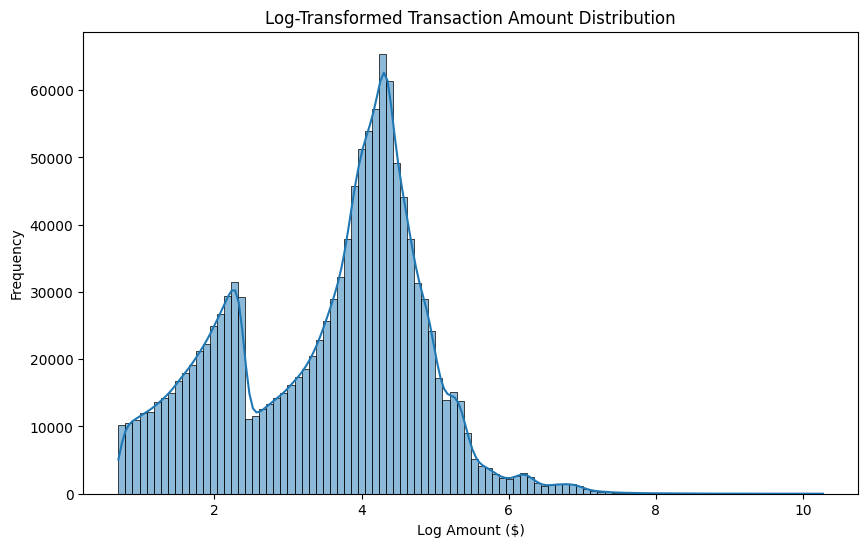

In [154]:
# For Numerical Variables
# Add a new column with log-transformed amount (+1 to avoid log(0))
df['log_amt'] = np.log(df['amt'] + 1)

# Plot transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['log_amt'], bins=100, kde=True)
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log Amount ($)')
plt.ylabel('Frequency')
plt.show()



- From the statistical summary above we see we are dealing with skewed data that is right-skewed(Positive skew)
- We also note most transactions are small while few are very large which show potential fraud risk.
- Log transformation helped compress extreme values into a manageable range for visualization and hopefully for modeling

### Pie chart

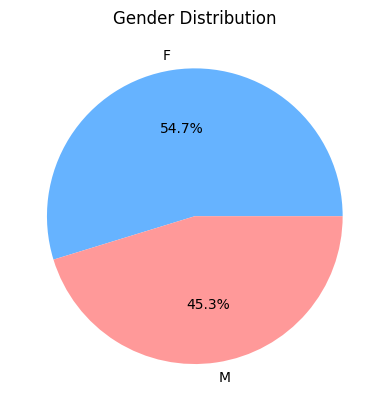

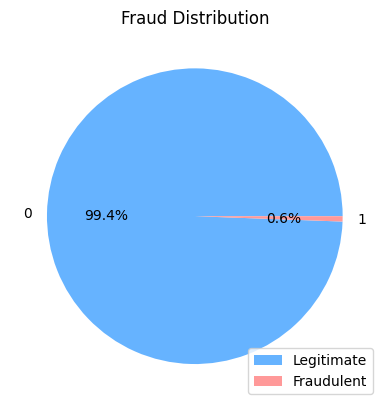

In [155]:
# For categorical variables
# check the pie chart for gender distribution
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


#check the pie chart for is_fraud
df['is_fraud'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Fraud Distribution')
plt.ylabel('')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()


- This dataset is fairly balanced by gender showing a slight majority of transactions being made by female customers
- The second pie chart however shows a significant class imbalance with fraudulent transactins taking a small proportion.
- For that before modeling we will have to address class imbalance using SMOTE

## Bivariate Analysis

### Box Plot

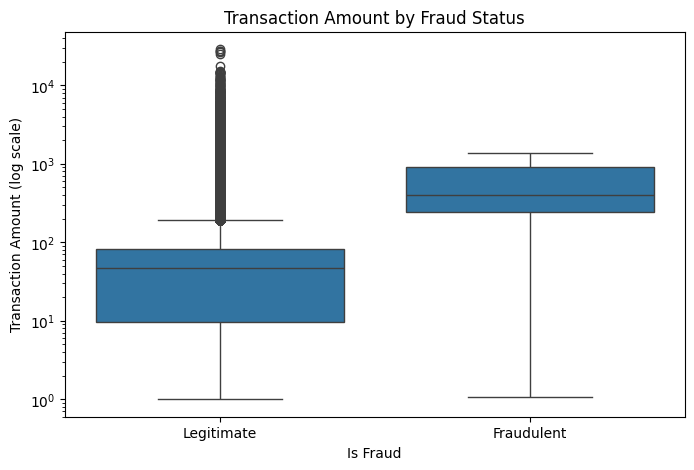

In [156]:
#Numerical Vs Categorical Data
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')  # because of skewed amounts
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount (log scale)')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()


- From the boxplot analysis, it was observed that legitimate transactions show a greater number of high-value outliers compared to fraudulent transactions.
- This suggests that large transaction amounts are not necessarily indicative of fraud, as legitimate customers also engage in occasional high-value purchases.


### Violin Plot

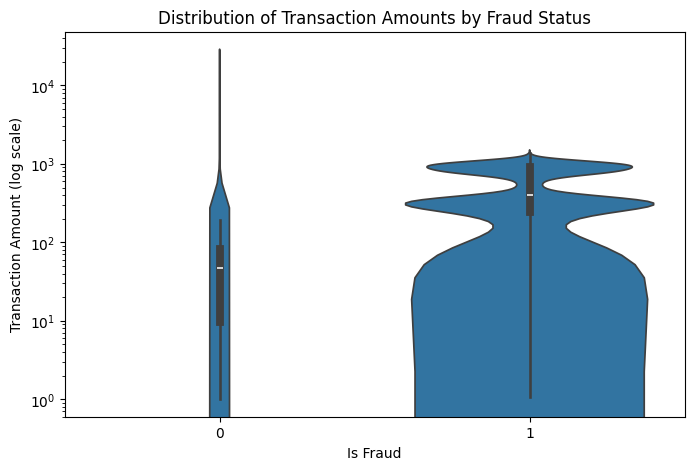

In [157]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount (log scale)')
plt.show()


- The violin plot comparing transaction amounts by fraud status reveals that legitimate transactions have a wider spread of amounts, including numerous high-value outliers, whereas fraudulent transactions are concentrated within a narrower range.
- This suggests that while high-value transactions are frequent among legitimate users, fraudulent activity tends to occur within moderate transaction amounts likely to avoid raising suspicion.
- This reinforces the need to incorporate additional transaction features beyond the amount for effective fraud detection.

### Grouped Bar Chart

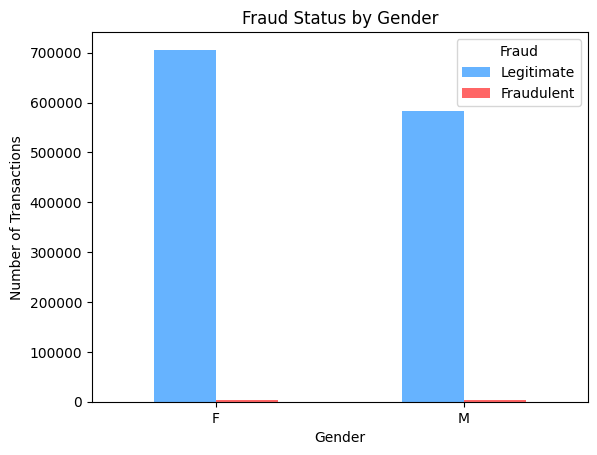

In [158]:
# Categorical Vs Categorical
fraud_gender = df.groupby(['gender', 'is_fraud']).size().unstack()

fraud_gender.plot(kind='bar', stacked=False, color=['#66b3ff','#ff6666'])
plt.title('Fraud Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Fraud', labels=['Legitimate', 'Fraudulent'])
plt.show()


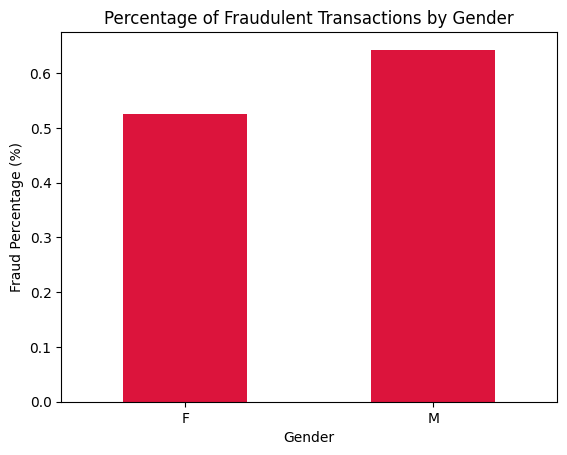

In [159]:
# Categorical Vs Categorical

fraud_gender = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)

# Convert to percentages
fraud_gender_pct = fraud_gender.div(fraud_gender.sum(axis=1), axis=0) * 100

# Plot percentage fraud bar chart
fraud_gender_pct[1].plot(kind='bar', color='crimson')
plt.title('Percentage of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(rotation=0)
plt.show()



In [160]:
print(df.groupby(['gender', 'is_fraud']).size())


gender  is_fraud
F       0           706128
        1             3735
M       0           583041
        1             3771
dtype: int64


- The initial grouped bar chart showed that both male and female customers primarily made legitimate transactions, with no visible fraudulent transactions.
- This was due to the extremely low number of fraud cases relative to legitimate transactions, making the fraud bars negligible in size.
- To better visualize fraud patterns, the data was normalized to percentages, revealing that both genders experienced fraud at similar low rates, with minor variations.

### Scatter plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


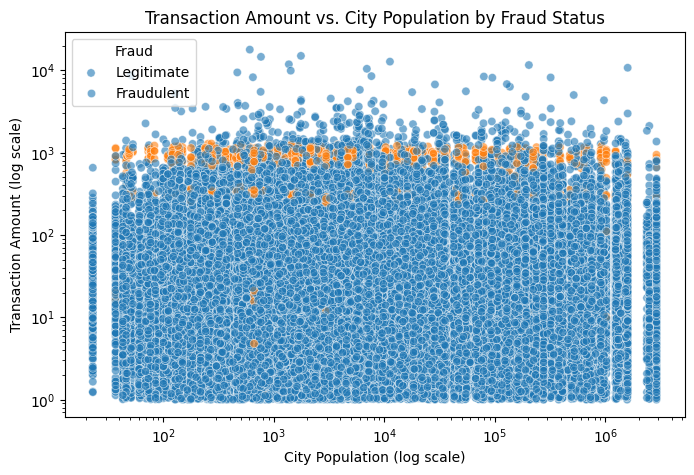

In [34]:
#Numerical Vs Numerical
plt.figure(figsize=(8, 5))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=df, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Transaction Amount vs. City Population by Fraud Status')
plt.xlabel('City Population (log scale)')
plt.ylabel('Transaction Amount (log scale)')
plt.legend(title='Fraud', labels=['Legitimate', 'Fraudulent'])
plt.show()


- Fraudulent transactions appear to be scattered across various city sizes and typically involve moderate to high transaction amounts. This suggests that fraud is not limited to highly populated urban areas and can occur in both small and large cities.
- Additionally, a few high-value fraudulent transactions were identified as outliers, indicating the importance of monitoring large transactions regardless of the city population.


## Multivariate Analysis

### Hypothesis testing to be done,

### Pairplot

<Figure size 1200x1000 with 0 Axes>

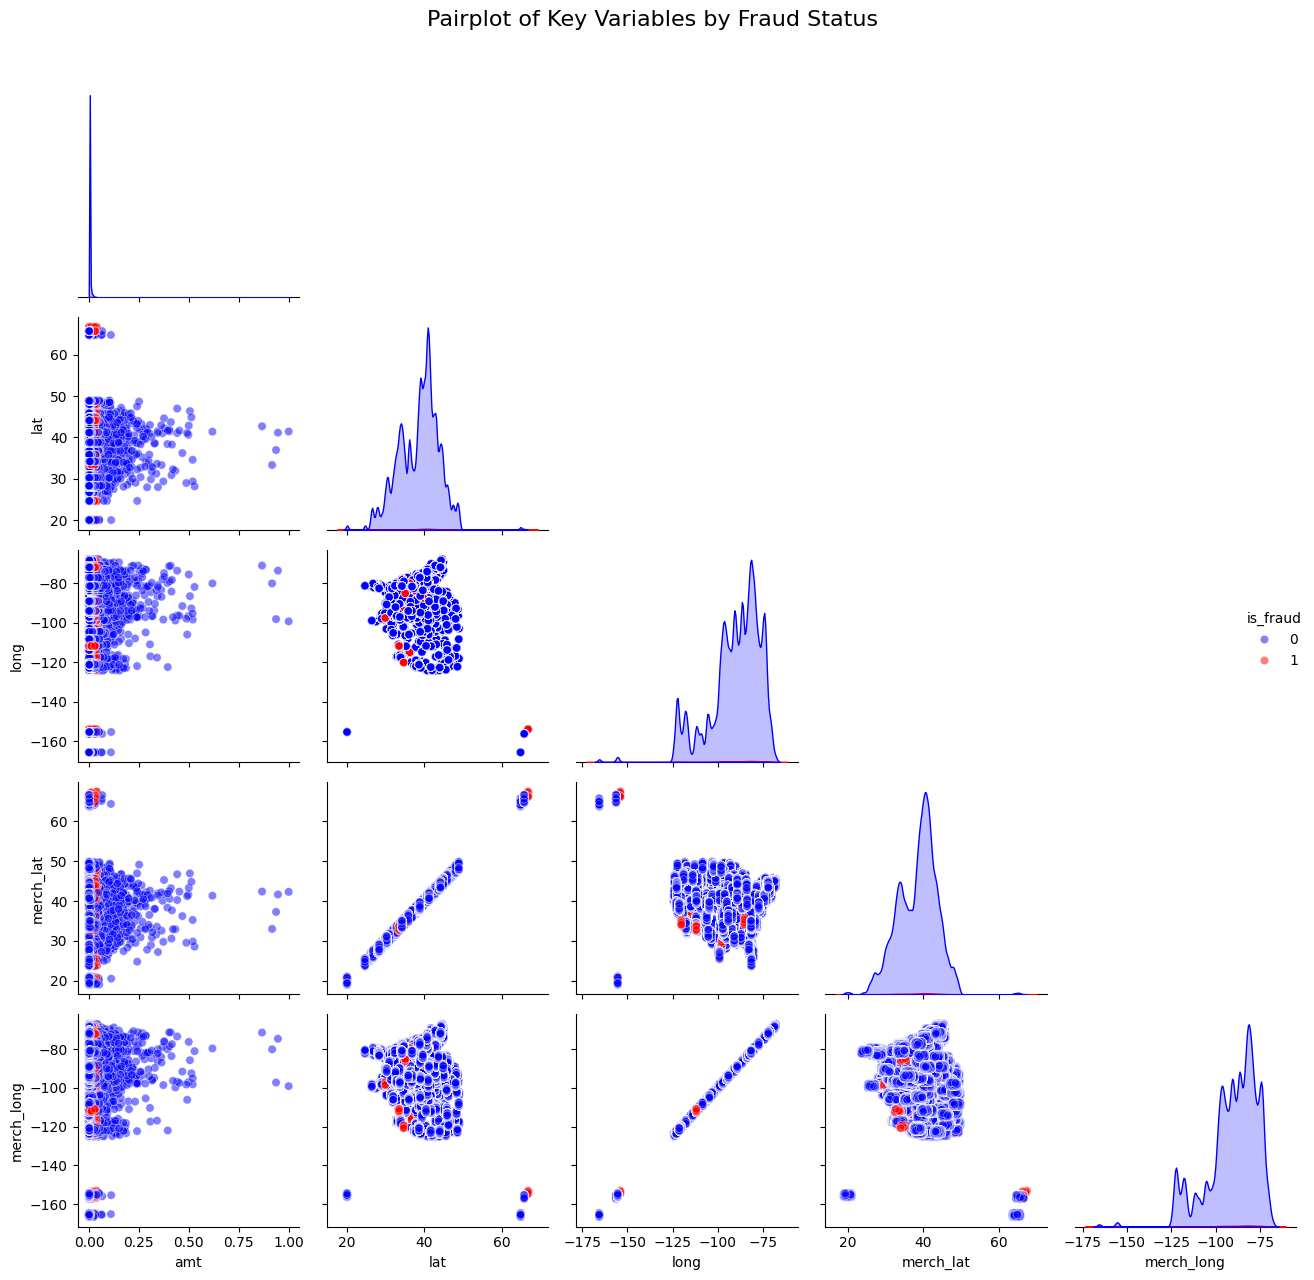

In [127]:
relevant_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud']

# Create a pairplot with hue based on fraud status
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(
    df[relevant_cols],
    hue='is_fraud',              # Color by fraud status
    palette=['blue', 'red'],     # Blue for non-fraud, red for fraud
    corner=True,                 # Show only the lower triangle to reduce redundancy
    plot_kws={'alpha': 0.5},     # Add transparency to see overlapping points
    diag_kind='kde'              # Use kernel density plots on the diagonal
)

pairplot.fig.suptitle('Pairplot of Key Variables by Fraud Status', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

The pair plot reveals the individual distributions of the numerical features and their pairwise relationships.

Transaction amounts are heavily skewed towards smaller values. Cardholder and merchant locations exhibit geographical clustering.

There's a weak indication of local shopping.

Importantly, the transaction amount doesn't show a strong linear relationship with location or city population within this visualization.

### Pivot Table

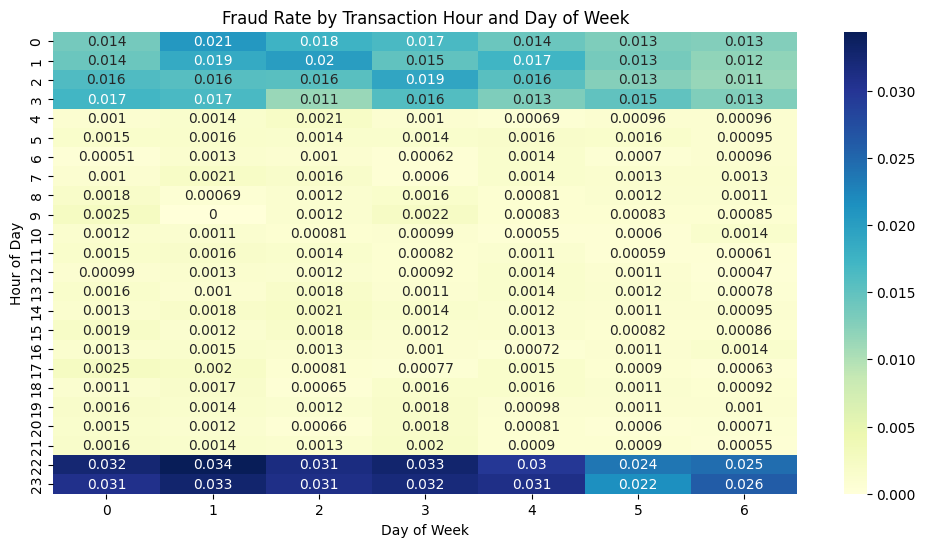

In [161]:
# Convert 'unix_time' to datetime objects
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract the hour and day of the week
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6

# Now create the pivot table and heatmap using the new columns
fraud_pivot = pd.pivot_table(df, values='is_fraud', index='hour', columns='day_of_week')
plt.figure(figsize=(12, 6))
sns.heatmap(fraud_pivot, annot=True, cmap='YlGnBu')
plt.title('Fraud Rate by Transaction Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

-  Fraudulent transactions tended to cluster at moderate transaction amounts during late-night hours, with higher fraud rates on weekends.

#Feature Engineering
- This helps improve model accuracy

In [162]:
# Split trans_date_trans_time into date and time columns
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed').dt.time

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['dob'] = pd.to_datetime(df['dob'])

## Encoding

In [163]:
# Label encoding for Binary Categories such as gender
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

In [164]:
#One hot encoding for Nominal Categories such as column category
df = pd.get_dummies(df, columns=['category'], prefix='category')

In [165]:
#We can also do one hot encoding for other Nominal Variables
df = pd.get_dummies(df, columns=['job','state'], prefix='job')


## Feature Selection
- Helps identify and retain relevant features of our model
- Reduces multicollinearity, Overfitting as well for better interpretation

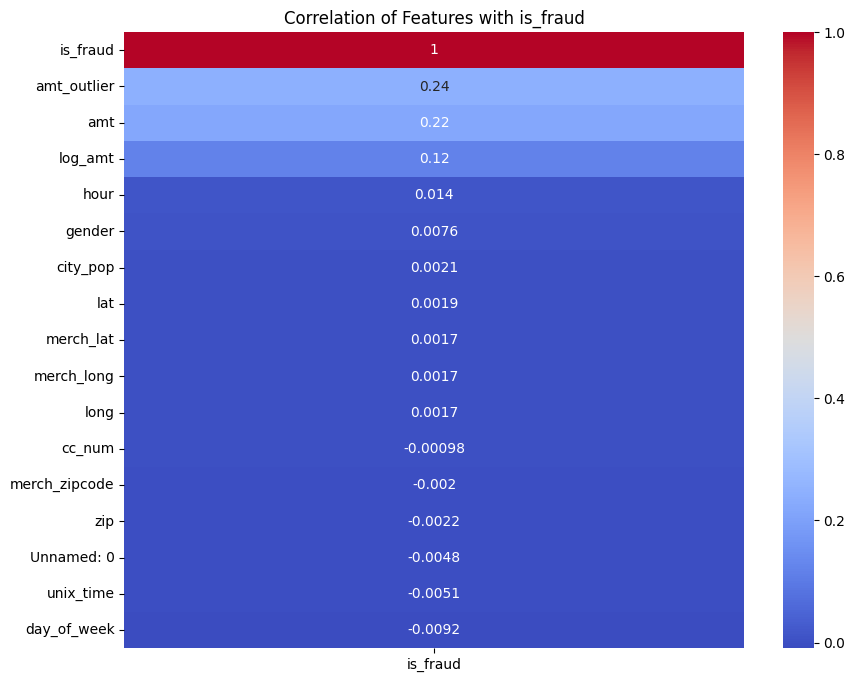

In [166]:
# check correlation target being is_fraud and plot
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# check correlation target being is_fraud and plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr()[['is_fraud']].sort_values(by='is_fraud', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with is_fraud')
plt.show()

In [167]:
# check correlation target being is_fraud and plot
# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

# Select upper triangle of correlation matrix
upper = df_numeric.where(np.triu(np.ones(df_numeric.shape), k=1).astype(bool))

# Find features with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

['cc_num', 'amt', 'gender', 'zip', 'lat', 'city_pop', 'unix_time', 'merch_lat', 'merch_zipcode', 'amt_outlier', 'log_amt', 'day_of_week']


## Feature Scaling
- Simply trying to transform numerical variables so that they share a common scale

### Standardization

In [168]:
scaler = StandardScaler()

# Select numeric columns you want to scale
num_cols = ['amt', 'city_pop']

# Fit and transform the data
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check result
df[num_cols].head()


,amt,city_pop
0,-0.407826,-0.282589
1,0.230039,-0.293670
2,0.934149,-0.280406
3,-0.158132,-0.287742
4,-0.177094,-0.293835


### MinMaxScaler

In [169]:
scaler = MinMaxScaler()

# Select numeric columns to scale
num_cols = ['amt', 'city_pop']

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# Check result
df[num_cols].head()


,amt,city_pop
0,0.000137,0.001194
1,0.003670,0.000043
2,0.007569,0.001421
3,0.001520,0.000659
4,0.001415,0.000026


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Columns: 587 entries, Unnamed: 0 to job_WY
dtypes: bool(559), datetime64[ns](3), float64(8), int32(2), int64(7), object(8)
memory usage: 958.4+ MB


1. Complete the Feature Engineering Section
Enhance with:

Time-based features (hour, day_of_week)

Transaction frequency features (time_diff, txn_count_1hr)

Amount z-score per user

Geographic distance (if applicable)

In [171]:
# Convert timestamp columns to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s')

# Extract day of week
df['day_of_week'] = df['datetime'].dt.dayofweek

# Sort by cardholder and time
df = df.sort_values(by=['cc_num', 'datetime'])

# Calculate time difference between transactions per user
df['prev_time'] = df.groupby('cc_num')['datetime'].shift(1)
df['time_diff_min'] = (df['datetime'] - df['prev_time']).dt.total_seconds() / 60
df['time_diff_min'] = df['time_diff_min'].fillna(0)

# Z-score of amount per user
df['amount_mean'] = df.groupby('cc_num')['amt'].transform('mean')
df['amount_std'] = df.groupby('cc_num')['amt'].transform('std')
df['amount_zscore'] = (df['amt'] - df['amount_mean']) / (df['amount_std'] + 1e-6)


In [172]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,...,job_VT,job_WA,job_WI,job_WV,job_WY,prev_time,time_diff_min,amount_mean,amount_std,amount_zscore
1017,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",0.000217,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,NaT,0.000000,0.001901,0.004236,-0.397462
2724,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,0.001794,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-01 12:47:15,1197.700000,0.001901,0.004236,-0.025137
2726,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,0.002801,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-02 08:44:57,2.650000,0.001901,0.004236,0.212427
2882,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,0.001167,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-02 08:47:36,230.633333,0.001901,0.004236,-0.173105
2907,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,0.000904,Mary,Diaz,0,9886 Anita Drive,Fort Washakie,...,False,False,False,False,True,2012-01-02 12:38:14,32.533333,0.001901,0.004236,-0.235146


### PCA

Use PCA for dimensionality reduction + visualization.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


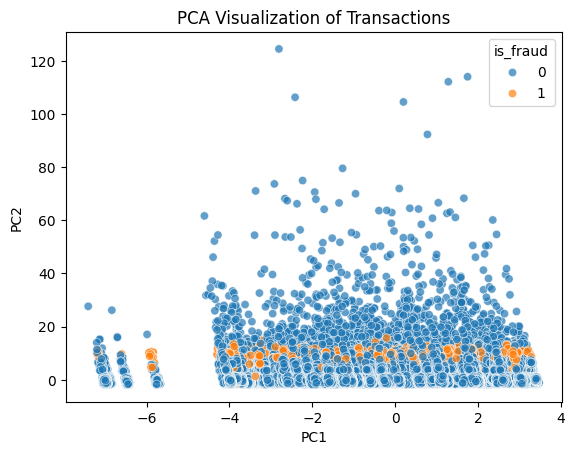

In [173]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['is_fraud'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['is_fraud'] = df['is_fraud'].values
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="is_fraud", alpha=0.7)
plt.title("PCA Visualization of Transactions")
plt.show()


Number of NaN values in features before imputation: 0
Number of NaN values in features after imputation: 0


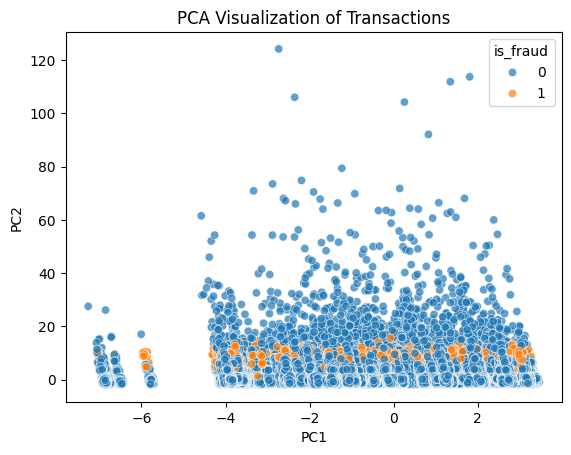

In [174]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import imputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy for isnan check
import pandas as pd # Ensure pandas is imported

# --- Assuming df is the DataFrame after all Feature Engineering ---
# (This includes encoding, new features like time_diff_min, amount_zscore, etc.)

# Select features for PCA. Ensure this matches the columns used for scaling.
# Drop columns that are identifiers, original timestamps, or derived intermediate columns not needed for PCA
# Also drop the target variable 'is_fraud'
features = df.drop(columns=['is_fraud',          # Target variable
                            'cc_num',            # Identifier
                            'trans_date_trans_time', # Original timestamp
                            'unix_time',         # Original timestamp
                            'datetime',          # Derived timestamp
                            'prev_time',         # Intermediate column for time_diff calculation
                            # Add any other non-numeric or irrelevant columns if present
                            ], errors='ignore')

# Keep only numerical columns for PCA
features = features.select_dtypes(include=np.number)

# --- Handle any remaining NaNs in the features BEFORE scaling and PCA ---
print(f"Number of NaN values in features before imputation: {features.isnull().sum().sum()}")

# Use SimpleImputer to replace NaNs (e.g., with the mean of each column)
# You can choose a different strategy like 'median' or 'most_frequent' if needed
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

print(f"Number of NaN values in features after imputation: {np.isnan(features_imputed).sum()}")


# Standardize the imputed features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_imputed)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
# Ensure the index aligns if rows were dropped due to NaN in target
# Or, if using imputed features derived from df, ensure df['is_fraud'] has the same index
# If using the imputed array, get the corresponding 'is_fraud' values from the original df
pca_df['is_fraud'] = df.loc[features.index, 'is_fraud'].values # Align with the index of the features DataFrame

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="is_fraud", alpha=0.7)
plt.title("PCA Visualization of Transactions")
plt.show()

3. Cost-Sensitive Learning
Adjust classifier to penalize misclassifying fraud more.

In [175]:

# Assuming 'is_fraud' is the target column
X = df.drop(columns=['is_fraud'])  # Replace with actual target column name if different
y = df['is_fraud']

# Optional: Drop columns you don't want to include (like IDs, timestamps, etc.)
X = X.drop(columns=['cc_num', 'trans_date_trans_time', 'unix_time', 'datetime', 'prev_time'], errors='ignore')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


#Modeling

- Before beginning on modeling we had noticed a class imbalance problem that needed to be handled using SMOTE.

In [176]:
#Check class distribution
df['is_fraud'].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994211
1,0.005789


In [177]:
# Drop 'trans_date_trans_time' if still present
X = df.drop(columns=['is_fraud', 'trans_date_trans_time'])  # if you've already dropped it, remove from this line
y = df['is_fraud']


In [178]:
print(X.dtypes)


Unnamed: 0                int64
cc_num                    int64
merchant                 object
amt                     float64
first                    object
                      ...      
prev_time        datetime64[ns]
time_diff_min           float64
amount_mean             float64
amount_std              float64
amount_zscore           float64
Length: 590, dtype: object


In [179]:
X = df.drop(columns=['is_fraud', 'trans_date_trans_time'])  # and other non-numeric columns if needed

# Drop object and bool columns
X = X.select_dtypes(include=['int64', 'float64'])


In [180]:
# Convert bool to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


In [181]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [182]:
X = X.drop(columns=X.select_dtypes(include='object').columns)


In [183]:
print(X.dtypes.value_counts())


float64    12
int64       6
Name: count, dtype: int64


In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [185]:
print(X.isnull().sum())


Unnamed: 0       0
cc_num           0
amt              0
gender           0
zip              0
lat              0
long             0
city_pop         0
unix_time        0
merch_lat        0
merch_long       0
merch_zipcode    0
amt_outlier      0
log_amt          0
time_diff_min    0
amount_mean      0
amount_std       0
amount_zscore    0
dtype: int64


In [186]:
X = X.fillna(0)


In [187]:
print(X.isnull().sum().sum())  # Should be 0


0


In [188]:
model = RandomForestClassifier(class_weight={0:1, 1:10}, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.88      0.43      0.58      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.71      0.79    259335
weighted avg       1.00      1.00      1.00    259335



In [189]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(y_res.value_counts())


is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [ ]:
# @title
# Re-import necessary libraries just in case the notebook kernel was reset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Keep RandomForest from previous sections if needed
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Make sure required libraries are installed
# !pip install --upgrade pandas scikit-learn imbalanced-learn matplotlib seaborn

# Assuming 'df' is the DataFrame after initial cleaning and feature engineering up to before the split/SMOTE steps
# Let's go back to the state of df right after Feature Engineering and Scaling

# --- Assuming df is the DataFrame after all Feature Engineering and Scaling ---
# (This includes encoding, new features like time_diff_min, amount_zscore, amt_outlier, log_amt, etc.)
# Let's explicitly select the columns we want to use as features (X) and the target (y)
# This is crucial to avoid including columns that are not suitable for the model or SMOTE

# Drop columns that are identifiers, original timestamps, or derived intermediate columns not needed for modeling
# Keep the 'datetime' column for potential future time-series analysis if needed, but drop for this model
X = df.drop(columns=['is_fraud',          # Target variable
                     'cc_num',            # Identifier
                     'trans_date_trans_time', # Original timestamp
                     'unix_time',         # Original timestamp
                     'datetime',          # Derived timestamp
                     'prev_time',         # Intermediate column for time_diff calculation
                     'file_path',         # Assuming this column was introduced somewhere and isn't needed
                     'customer_id'        # Customer ID from clustering section if it was merged back
                     ], errors='ignore') # Use errors='ignore' in case some columns were already dropped

y = df['is_fraud'] # Target variable

# --- Handle any remaining non-numeric columns if they weren't dropped/encoded correctly ---
# Find object columns
object_cols = X.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print(f"Dropping object columns: {list(object_cols)}")
    X = X.drop(columns=object_cols)

# Find boolean columns and convert to int if necessary (some models handle bool, but int is safer)
bool_cols = X.select_dtypes(include='bool').columns
if len(bool_cols) > 0:
    print(f"Converting bool columns to int: {list(bool_cols)}")
    X[bool_cols] = X[bool_cols].astype(int)

# --- Handle Missing Values before splitting and SMOTE ---
# Fill any remaining NaNs in features. Filling with 0 is a simple strategy,
# but consider mean/median/more sophisticated imputation if appropriate.
if X.isnull().sum().sum() > 0:
    print(f"Filling {X.isnull().sum().sum()} NaN values in X with 0.")
    X = X.fillna(0)

# --- Ensure X contains only numerical features at this point ---
# Check data types again
print("\nData types of features (X) before splitting and SMOTE:")
print(X.dtypes.value_counts())
if len(X.select_dtypes(exclude=['int64', 'float64']).columns) > 0:
    print("WARNING: X still contains non-numeric columns!")
    print(X.select_dtypes(exclude=['int64', 'float64']).columns)


# --- Now, perform the train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nOriginal training set size: {len(X_train)}")
print(f"Original test set size: {len(X_test)}")
print(f"Original training target distribution:\n{y_train.value_counts()}")
print(f"Original test target distribution:\n{y_test.value_counts()}")


# --- Apply SMOTE ONLY to the training data ---
print("\nApplying SMOTE to the training data...")
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f"Resampled training set size: {len(X_res)}")
print(f"Resampled training target distribution:\n{y_res.value_counts()}")

# --- Train the model using the RESAMPLED training data ---
print("\nTraining Logistic Regression model...")
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_res, y_res) # Fit with X_res, y_res

# --- Evaluate the model using the ORIGINAL test data ---
print("\nEvaluating model on the test data...")
y_pred_lr = model_lr.predict(X_test) # Predict with X_test
y_proba_lr = model_lr.predict_proba(X_test)[:,1] # Predict probabilities with X_test

# Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_lr))

# You can now also train the RandomForest model using the resampled data
# model_rf = RandomForestClassifier(class_weight={0:1, 1:10}, random_state=42)
# model_rf.fit(X_res, y_res)
# y_pred_rf = model_rf.predict(X_test)
# print("\nRandom Forest Evaluation:")
# print(classification_report(y_test, y_pred_rf))
# print("ROC AUC Score:", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]))

Dropping object columns: ['merchant', 'first', 'last', 'street', 'city', 'trans_num', 'trans_time']


In [ ]:
# @title
# Re-import necessary libraries just in case the notebook kernel was reset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Keep RandomForest from previous sections if needed
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Make sure required libraries are installed
!pip install --upgrade pandas scikit-learn imbalanced-learn matplotlib seaborn

# Assuming 'df' is the DataFrame after initial cleaning and feature engineering up to before the split/SMOTE steps
# Let's go back to the state of df right after Feature Engineering and Scaling

# --- Assuming df is the DataFrame after all Feature Engineering and Scaling ---
# (This includes encoding, new features like time_diff_min, amount_zscore, amt_outlier, log_amt, etc.)
# Let's explicitly select the columns we want to use as features (X) and the target (y)
# This is crucial to avoid including columns that are not suitable for the model or SMOTE

# Drop columns that are identifiers, original timestamps, or derived intermediate columns not needed for modeling
# Keep the 'datetime' column for potential future time-series analysis if needed, but drop for this model
#X = df.drop(columns=['is_fraud',          # Target variable
                     'cc_num',            # Identifier
                     'trans_date_trans_time', # Original timestamp
                     'unix_time',         # Original timestamp
                     'datetime',          # Derived timestamp - **Explicitly dropping this**
                     'prev_time',         # Intermediate column for time_diff calculation
                     'file_path',         # Assuming this column was introduced somewhere and isn't needed
                     'customer_id',       # Customer ID from clustering section if it was merged back
                     'trans_date',        # Date column derived from timestamp - **Also drop this**
                     'trans_time'         # Time column derived from timestamp - **Also drop this**
                     ], errors='ignore') # Use errors='ignore' in case some columns were already dropped

#y = df['is_fraud'] # Target variable

# --- Handle any remaining non-numeric columns if they weren't dropped/encoded correctly ---
# Find object columns
object_cols = X.select_dtypes(include='object').columns
if len(object_cols) > 0:
    print(f"Dropping object columns: {list(object_cols)}")
    X = X.drop(columns=object_cols)

# Find boolean columns and convert to int if necessary (some models handle bool, but int is safer)
bool_cols = X.select_dtypes(include='bool').columns
if len(bool_cols) > 0:
    print(f"Converting bool columns to int: {list(bool_cols)}")
    X[bool_cols] = X[bool_cols].astype(int)

# --- Handle Missing Values before splitting and SMOTE ---
# Fill any remaining NaNs in features. Filling with 0 is a simple strategy,
# but consider mean/median/more sophisticated imputation if appropriate.
if X.isnull().sum().sum() > 0:
    print(f"Filling {X.isnull().sum().sum()} NaN values in X with 0.")
    X = X.fillna(0)

# --- Ensure X contains only numerical features at this point ---
# Check data types again
print("\nData types of features (X) before splitting and SMOTE:")
print(X.dtypes.value_counts())
if len(X.select_dtypes(exclude=['int64', 'float64']).columns) > 0:
    print("WARNING: X still contains non-numeric columns!")
    print(X.select_dtypes(exclude=['int64', 'float64']).columns)


# --- Now, perform the train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nOriginal training set size: {len(X_train)}")
print(f"Original test set size: {len(X_test)}")
print(f"Original training target distribution:\n{y_train.value_counts()}")
print(f"Original test target distribution:\n{y_test.value_counts()}")


# --- Apply SMOTE ONLY to the training data ---
print("\nApplying SMOTE to the training data...")
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f"Resampled training set size: {len(X_res)}")
print(f"Resampled training target distribution:\n{y_res.value_counts()}")

# --- Train the model using the RESAMPLED training data ---
print("\nTraining Logistic Regression model...")
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_res, y_res) # Fit with X_res, y_res

# --- Evaluate the model using the ORIGINAL test data ---
print("\nEvaluating model on the test data...")
y_pred_lr = model_lr.predict(X_test) # Predict with X_test
y_proba_lr = model_lr.predict_proba(X_test)[:,1] # Predict probabilities with X_test

# Evaluate
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba_lr))

# You can now also train the RandomForest model using the resampled data
# model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# model_rf.fit(X_res, y_res)
# y_pred_rf = model_rf.predict(X_test)
# print("\nRandom Forest Evaluation:")
# print(classification_report(y_test, y_pred_rf))
# print("ROC AUC Score:", roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]))

In [ ]:
# @title
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_dt.fit(X_res, y_res)

y_pred_dt = model_dt.predict(X_test)
y_proba_dt = model_dt.predict_proba(X_test)[:,1]

# Evaluate
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_dt))

In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_res, y_res)

y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:,1]

# Evaluate
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

In [ ]:
# Assign to customer_spending for consistency with previous discussion
customer_spending = df.copy()

# --- 2. Feature Engineering (Deriving RFM and other specified features) ---
# Ensure date columns are datetime objects
customer_spending['trans_date'] = pd.to_datetime(customer_spending['trans_date'])
customer_spending['dob'] = pd.to_datetime(customer_spending['dob']) # Also convert dob for consistency

# Identify unique customers (assuming 'cc_num' is the customer identifier)
# If you have a separate 'customer_id' column, use that instead.
customer_spending['customer_id'] = customer_spending['cc_num'] # Create a consistent customer_id column

# Determine snapshot date for Recency calculation
snapshot_date = customer_spending['trans_date'].max() + dt.timedelta(days=1)

# Group by customer_id to calculate RFM and other aggregates
customer_rfm = customer_spending.groupby('customer_id').agg(
    Recency=('trans_date', lambda date: (snapshot_date - date.max()).days),
    Frequency=('trans_num', 'nunique'),
    Monetary=('amt', 'sum'),
    average_transaction_amount=('amt', 'mean'),
    total_transaction_count=('trans_num', 'nunique'), # Same as frequency if based on unique trans_num
    unique_categories=('category', 'nunique')
).reset_index()

# Set customer_spending to this new DataFrame containing customer-level features
customer_spending = customer_rfm.copy()

# --- 3. Define Numerical Features for Clustering ---
numerical_features = [
    'Recency',
    'Frequency',
    'Monetary',
    'average_transaction_amount',
    'total_transaction_count',
    'unique_categories'
]

# --- 4. Handle Missing Values (if any appear after feature engineering) ---
customer_spending.dropna(subset=numerical_features, inplace=True)

# --- 5. Prepare Data for Scaling ---
X = customer_spending[numerical_features].copy()

# --- 6. Scale the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)

# --- 7. Determine Optimal K (Elbow Method) ---
inertia = []
range_of_clusters = range(1, 11)

for i in range_of_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()

In [ ]:
# --- 8. Train K-Means with Optimal K & Assign Clusters ---
# IMPORTANT: Update optimal_k based on your Elbow plot analysis.
optimal_k = 3 # Placeholder. Change this based on your plot.

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
customer_spending['cluster'] = kmeans.fit_predict(X_scaled_df)

# --- 9. Review Cluster Sizes ---
print("\nCluster Counts:")
print(customer_spending['cluster'].value_counts().sort_index())

In [ ]:
# --- 10. Analyze Cluster Profiles ---
cluster_profiles = customer_spending.groupby('cluster')[numerical_features].mean()
print("\nCluster Profiles (Mean Values):")
print(cluster_profiles)
# --- 11. Visualize Cluster Profiles ---
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 5 * len(numerical_features)))
fig.suptitle('Mean Value of Features Across Clusters', y=1.02, fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_xlabel('Cluster ID')
    axes[i].set_ylabel(f'Mean {feature}')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [ ]:
# --- 12. Pair Plot of Key Features ---
key_plot_features = ['Recency', 'Frequency', 'Monetary']
sns.pairplot(customer_spending, vars=key_plot_features, hue='cluster', palette='viridis', diag_kind='kde', height=3)
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02, fontsize=16)
plt.show()

In [ ]:
# Use the Elbow method to find the optimal number of clusters (k)
inertia = []
range_of_clusters = range(1, 11)  # Try numbers of clusters from 1 to 10

for i in range_of_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 3

# Train the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
customer_spending['cluster'] = kmeans.fit_predict(X_scaled)

print("\nCustomer Segments:")
print(customer_spending.head())
print("\nCluster Counts:")
print(customer_spending['cluster'].value_counts())
cluster_profiles = customer_spending.groupby('cluster')[numerical_features].mean()
print("\nCluster Profiles (Mean Values):")
print(cluster_profiles)

In [ ]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled training set shape: {X_train_smote.shape}, {y_train_smote.shape}")
print(f"Original training target distribution:\n{y_train.value_counts()}")
print(f"Resampled training target distribution:\n{y_train_smote.value_counts()}")

In [ ]:
# Train a RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest_model.fit(X_train_smote, y_train_smote)

# Model Evaluation
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

print("\n--- Random Forest Classifier Performance (on Test Set) ---")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {auc_roc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', alpha=0.7, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()